# Bibliotecas:

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob

# Fazer e testar uma função que recebe como entrada um array de anos e um de meses e retorna um array de anos decimais.

In [296]:
#Criando uma variável 

tabela = np.loadtxt ("dados/0.80S-49.02W-TAVG-Trend.txt", comments="%")

def anos_decimais(anos, meses):
    
    #Testando a função para as variaveis serem do tipo correto
    assert type(anos) == np.ndarray, "Este dado deve ser um array"
    assert type(meses) == np.ndarray, "Este dado deve ser um array"
    
    #Retornando o número pela equação
    return ((meses - 1)/10 + anos)

In [297]:
#Teste com o tipo dos dados corretos

print (anos_decimais(tabela[:, 0], tabela[:, 1]))

[ 1845.   1845.1  1845.2 ...,  2013.6  2013.7  2013.8]


In [298]:
#Teste com os tipos de dados incorretos

print (anos_decimais(4, 5))

AssertionError: Este dado deve ser um array

# Fazer e testar uma função que recebe como entrada uma matriz (array 2d) de dados de temperaturas e retorna os anos decimais, a anomalia anual, anomalia de 10 anos e sua respectiva incerteza:

In [4]:
def fragmentar_dados(dados):
    
    assert type(dados) == np.ndarray , "O dado inserido deve ser uma tabela"
    
    anos = dados[:, 0]
    meses = dados[:, 1]
    ano_decimal1 = (meses - 1)/12 + anos
    anomalia_anual1 = dados[:, 4]
    anomalia_10anos1 = dados [:,8]
    unc_10anos1 = dados [:, 9]
    unc_95pos1 = (anomalia_10anos1 + unc_10anos1)
    unc_95neg1 = (anomalia_10anos1 - unc_10anos1)
    
    return (ano_decimal1, anomalia_anual1, anomalia_10anos1, unc_95pos1, unc_95neg1)

In [8]:
fragmentar_dados ("dados/0.80S-49.02W-TAVG-Trend.txt")

AssertionError: O dado inserido deve ser uma tabela

# Use as funções criadas acima para repetir a tarefa da prática Python 2:

In [300]:
#Abrindo os dados em variaveis diferentes

ano_decial, anomalia_anual, anomalia_10anos, unc_95pos, unc_95neg = fragmentar_dados(np.loadtxt ("dados/0.80S-49.02W-TAVG-Trend.txt", comments="%"))

fragmentar_dados(np.loadtxt ("dados/0.80S-49.02W-TAVG-Trend.txt", comments="%"))

(array([ 1845. ,  1845.1,  1845.2, ...,  2013.6,  2013.7,  2013.8]),
 array([   nan,    nan, -0.872, ...,    nan,    nan,    nan]),
 array([ nan,  nan,  nan, ...,  nan,  nan,  nan]),
 array([ nan,  nan,  nan, ...,  nan,  nan,  nan]),
 array([ nan,  nan,  nan, ...,  nan,  nan,  nan]))

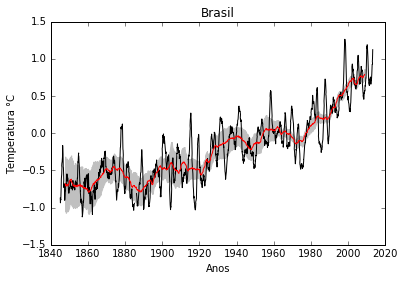

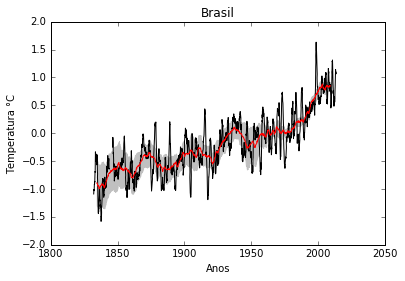

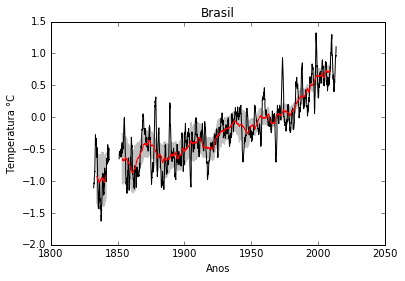

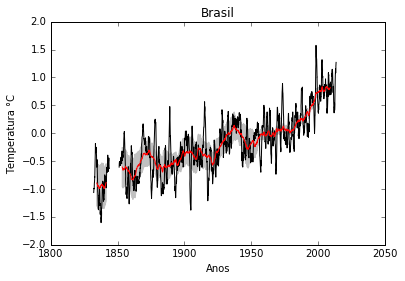

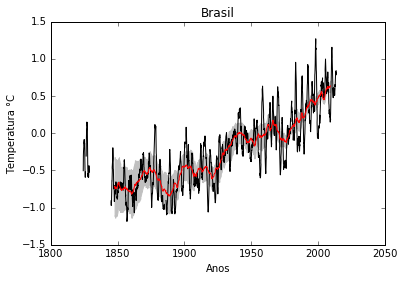

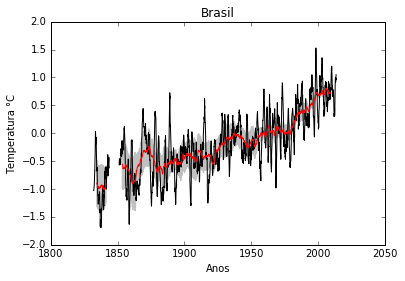

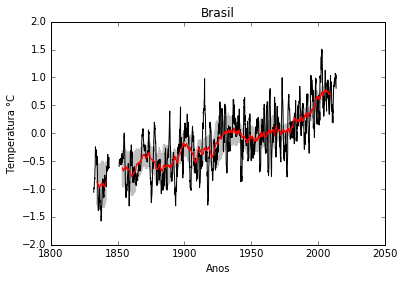

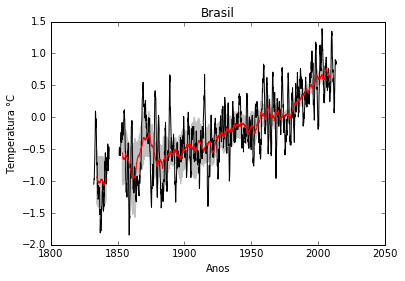

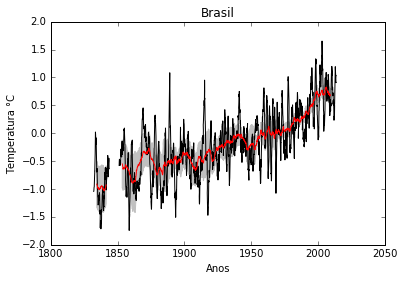

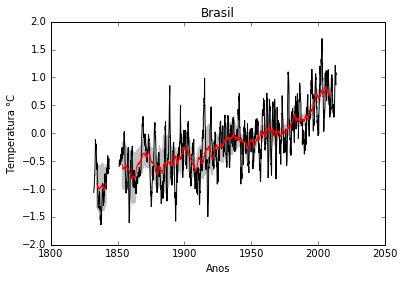

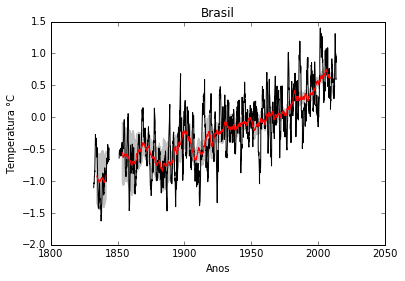

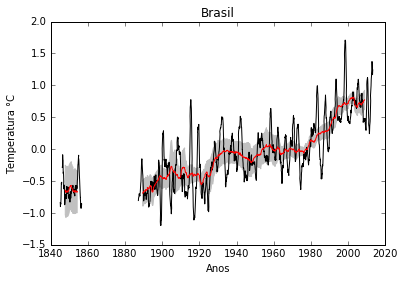

In [304]:
nome_arquivos = glob.glob("dados/*W-TAVG-Trend.txt")

#Começamos a repetição para todos os arquivos da variavel "nome_arquivos"
for item in nome_arquivos:
    
    #Primeiro de tudo, criamos as variáveis a partir da função 
    
    ano_decimal, anomalia_anual, anomalia_10anos, unc_95pos, unc_95neg = fragmentar_dados(np.loadtxt (item, comments="%"))
    
    #Agora começa a criação do gráfico
    plt.figure()
    
    plt.fill_between(ano_decimal, unc_95pos, unc_95neg, color = "#C0C0C0")
    plt.plot (ano_decimal, anomalia_anual, c = "#000000")
    plt.plot (ano_decimal, anomalia_10anos, c = "red")
    
    #Definimos os nomes de cada eixo
    plt.xlabel ("Anos")
    plt.ylabel ("Temperatura °C")
    plt.title("Brasil")

    #Finalmente salvamos a figura em formato png na pasta gráficos com o nome dos próprios arquivos que extraimos os dados
    plt.savefig(item[6:-3] + "png", format = "png")

# Bonus:
##### (Fazer e testar uma função que recebe como entrada o nome de um arquivo de dados, o nome de uma pasta e o formato da figura e retorna o nome da respectiva figura trocando o .txt pela extensão e adicionando o nome da pasta.)

In [302]:
def organizar_dados(arquivo, formato, pasta):
    
    #Testando a função para as variaveis serem do tipo correto
    assert type(arquivo) == str, "Este dado deve ser uma string contendo o nome do arquivo"
    assert type(formato) == str, "Este dado deve ser uma string contendo o formato desejado"
    assert type(pasta) == str, "Este dado deve ser uma string com o nome da pasta a ser inserida a figura"
    
    #Primeiro de tudo, criamos as variáveis 
    
    ano_decimal, anomalia_anual, anomalia_10anos, unc_95pos, unc_95neg = fragmentar_dados(np.loadtxt (arquivo, comments="%"))
    
    #Agora começa a criação do gráfico
    plt.figure()
    
    plt.fill_between(ano_decimal, unc_95pos, unc_95neg, color = "#C0C0C0")
    plt.plot (ano_decimal, anomalia_anual, c = "#000000")
    plt.plot (ano_decimal, anomalia_10anos, c = "red")
    
    #Definimos os nomes de cada eixo
    plt.xlabel ("Anos")
    plt.ylabel ("Temperatura °C")
    plt.title("Brasil")

    #Finalmente salvamos a figura no formado desejado na pasta solicitada com o nome dos próprios arquivos.
    plt.savefig( pasta + arquivo[5:-3] + formato, format = formato)

# Exemplos:

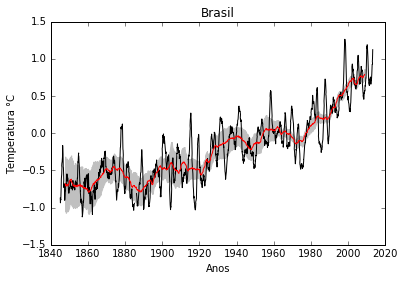

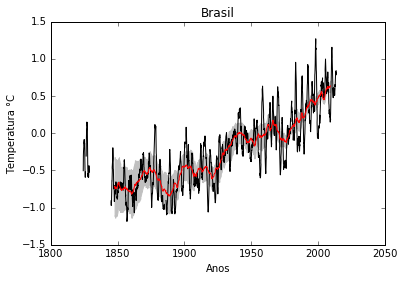

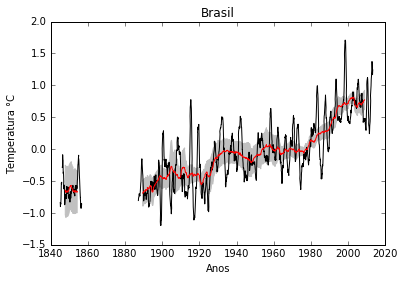

In [303]:
organizar_dados("dados/0.80S-49.02W-TAVG-Trend.txt", "pdf", "figuras")

organizar_dados("dados/2.41S-60.27W-TAVG-Trend.txt", "svg", "figuras")

organizar_dados("dados/4.02S-40.98W-TAVG-Trend.txt", "png", "figuras")